# Importing libraries

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from prophet import Prophet

# Downloading the Johnson&Johnson share

In [2]:
data = yf.download("JNJ", start = '2020-01-01', end = '2023-12-31', progress = False) #progress = progress bar
data = data.reset_index()

# Separating data in training and testing

In [4]:
data_train = data[data['Date'] < '2023-07-31']
data_test = data[data['Date'] >= '2023-07-31']

# Preparing the train data

In [5]:
#from training data, we will take the Date and the Close value that will be renamed by ds and y
data_prophet_train = data_train[['Date', 'Close']].rename(columns = {'Date':'ds', 'Close':'y'})
data_prophet_train

,ds,y
0,2020-01-02,145.970001
1,2020-01-03,144.279999
2,2020-01-06,144.100006
3,2020-01-07,144.979996
4,2020-01-08,144.960007
...,...,...
894,2023-07-24,171.080002
895,2023-07-25,172.389999
896,2023-07-26,172.720001
897,2023-07-27,173.690002


# Creating and Training the model

In [6]:
#I'm saying to the model to pay attention on weekly and yearly seasonality
model = Prophet(weekly_seasonality=True, yearly_seasonality=True, daily_seasonality=False)

#including the holidays of US because the share JNJ is from US
model.add_country_holidays(country_name = 'US')

#learn and adjust
model.fit(data_prophet_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpt0pck041/du_oq5q1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt0pck041/vlusiv4c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84621', 'data', 'file=/tmp/tmpt0pck041/du_oq5q1.json', 'init=/tmp/tmpt0pck041/vlusiv4c.json', 'output', 'file=/tmp/tmpt0pck041/prophet_modeljly_2sw4/prophet_model-20240329105138.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:51:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:51:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Creating future dates to test the model

In [9]:
future = model.make_future_dataframe(periods = 150)
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,146.122755,144.779029,155.669040,146.122755,146.122755,0.0,0.0,0.0,0.0,...,0.254476,0.254476,0.254476,4.129962,4.129962,4.129962,0.0,0.0,0.0,150.507194
1,2020-01-03,146.098731,144.886813,156.090874,146.098731,146.098731,0.0,0.0,0.0,0.0,...,0.393547,0.393547,0.393547,3.930311,3.930311,3.930311,0.0,0.0,0.0,150.422588
2,2020-01-06,146.026658,144.181407,154.298452,146.026658,146.026658,0.0,0.0,0.0,0.0,...,-0.010894,-0.010894,-0.010894,3.290189,3.290189,3.290189,0.0,0.0,0.0,149.305952
3,2020-01-07,146.002633,143.783904,154.399342,146.002633,146.002633,0.0,0.0,0.0,0.0,...,0.158517,0.158517,0.158517,3.077639,3.077639,3.077639,0.0,0.0,0.0,149.238789
4,2020-01-08,145.978609,143.561406,154.678760,145.978609,145.978609,0.0,0.0,0.0,0.0,...,0.303936,0.303936,0.303936,2.872514,2.872514,2.872514,0.0,0.0,0.0,149.155059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,2023-12-21,149.716419,143.988461,164.880073,140.105065,158.814218,0.0,0.0,0.0,0.0,...,0.254476,0.254476,0.254476,4.602463,4.602463,4.602463,0.0,0.0,0.0,154.573358
1045,2023-12-22,149.663754,143.013360,164.292026,139.852391,158.855925,0.0,0.0,0.0,0.0,...,0.393547,0.393547,0.393547,4.732636,4.732636,4.732636,0.0,0.0,0.0,154.789936
1046,2023-12-23,149.611089,142.740038,163.972457,139.640034,158.904266,0.0,0.0,0.0,0.0,...,-0.549791,-0.549791,-0.549791,4.832364,4.832364,4.832364,0.0,0.0,0.0,153.893662
1047,2023-12-24,149.558424,142.475969,164.357498,139.463543,158.957528,0.0,0.0,0.0,0.0,...,-0.549791,-0.549791,-0.549791,4.900118,4.900118,4.900118,0.0,0.0,0.0,153.908751


# Creating graphics for the model

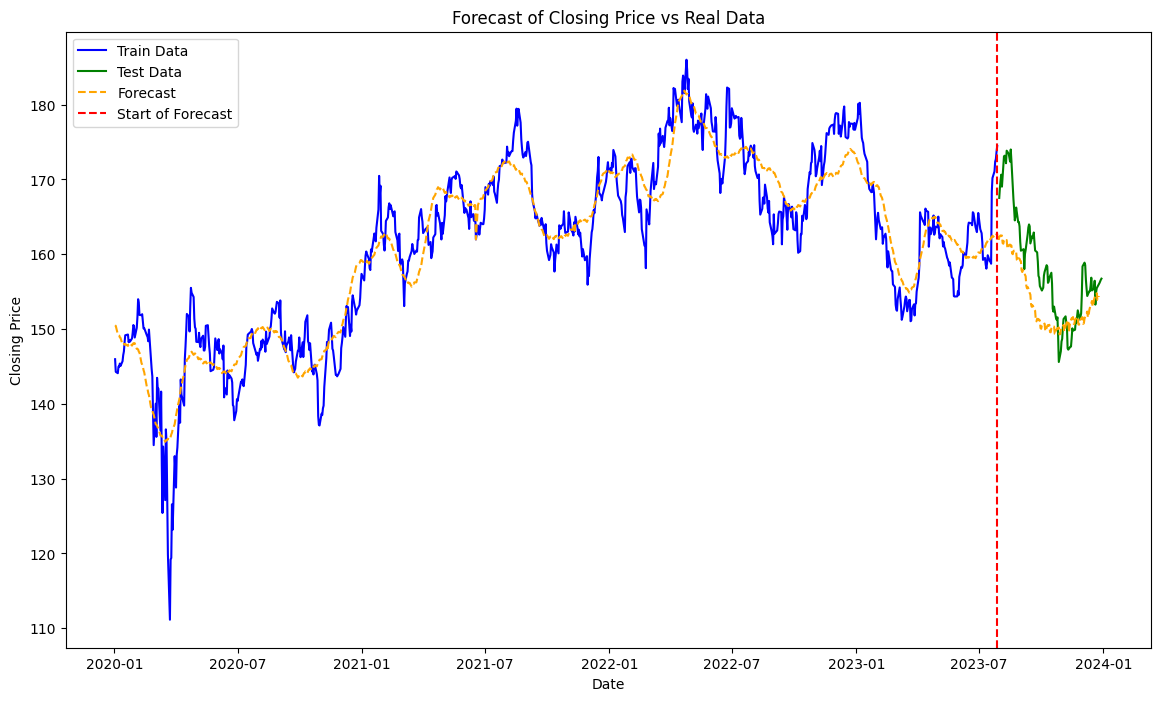

In [14]:
#defining the size of the graphic
plt.figure(figsize = (14, 8))

#plotting the train and test data (Date = x; Close = y)
plt.plot(data_train['Date'], data_train['Close'], label = 'Train Data', color = 'blue')
plt.plot(data_test['Date'], data_test['Close'], label = 'Test Data', color = 'green')

#plotting the future data
plt.plot(forecast['ds'], forecast['yhat'], label = 'Forecast', color = 'orange', linestyle = '--')

#creating a vertical line to show the start of forecast
plt.axvline(data_train['Date'].max(), color = 'red', label = 'Start of Forecast', linestyle = '--')

#setting labels
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Forecast of Closing Price vs Real Data')

#showing the labels
plt.legend()

#showing the graphic
plt.show()